<h2 style = "color: darkblue" align = "center" > K-Nearest Neibors: Diabetes Classification </h2>

## Basic Data Science and ML Pipeline

### OSEMN Pipeline 
* O - Obtaining our data
* S - Scrubbing / Cleaning our data
* E - Exploring / Visualizing our data will allow us to find patterns and trends
* M - Modeling our data will give us our predictive power as a wizard
* N - INterpreting our data


For reference : https://www.linkedin.com/pulse/life-data-science-osemn-randy-lao/?lipi=urn%3Ali%3Apage%3Ad_flagship3_profile_view_base_post_details%3BmDlg5VsdSBCLBps2R0vRZA%3D%3D

## Import needed packages

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline
plt.style.use('ggplot')

## Problem

Given the dataset about diabetes. Build a model to predict the diabetes status (outcome in dataset), follows steps in a common model: Preprocessing, Train, Test, Evaluation...

## About the dataset

In [3]:
#Loading csv dataset
data = pd.read_csv('E:\Python\ML_Learn\KNN\Diabetes Prediction\diabetes.csv')
data

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


### Information about dataset features

* **Pregnancies**: Number of times pregnant.
* **Glucose**: Plasma glucose concentration a 2 hours in an oral glucose tolerance test.
* **BloodPressure**: Diastolic blood pressure (mm Hg).
* **SkinThickness**: Triceps skin fold thickness (mm).
* **Insulin**: 2-Hour serum insulin (mu U/ml).
* **BMI**: Body mass index (weight in kg/(height in m)^2).
* **DiabetesPedigreeFunction**: Diabetes pedigree function.
* **Age**: Age
* **Outcome**: Class variable(1: Diabetes, 0: None Diabetes).

<h1 style= 'color: red'> Data Preprocessing </h1>

## Basic Exploratory Data Analysis (EDA) and Statistical Analysis


In [4]:
#information about dataset
data.info(verbose = True)
# From that, there is no null value

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [5]:
#Describe statistical analysis
data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


**DataFrame.describe()** method generates descriptive statistics that summarize the central tendency, dispersion and shape of a dataset’s distribution, excluding NaN values. This method tells us a lot of things about a dataset. One important thing is that the describe() method deals only with numeric values. It doesn't work with any categorical values. So if there are any categorical values in a column the describe() method will ignore it and display summary for the other columns unless parameter include="all" is passed.

Now, let's understand the statistics that are generated by the describe() method:
* count tells us the number of NoN-empty rows in a feature.
* mean tells us the mean value of that feature.
* std tells us the Standard Deviation Value of that feature.
* min tells us the minimum value of that feature.
* 25%, 50%, and 75% are the percentile/quartile of each features. This quartile information helps us to detect Outliers.
* max tells us the maximum value of that feature.

### The Question creeping out of this summary

#### Can minimum value of below listed columns be zero (0)?

On these columns, a value of zero in these following columns does not make sense and thus indicates missing value.

Following columns or variables have an invalid zero value:
1. Glucose
2. BloodPressure
3. SkinThickness
4. Insulin
5. BMI

### Find 0-value in each of these 5 columns and replace with NaN, then replace these Nan values with other values according to their distribution in their columns.

In [6]:
# Processing on the copy sample of dataset.
data_copy = data.copy(deep = True)
data_copy[["Glucose","BloodPressure","SkinThickness","Insulin","BMI"]] 

,Glucose,BloodPressure,SkinThickness,Insulin,BMI
0,148,72,35,0,33.6
1,85,66,29,0,26.6
2,183,64,0,0,23.3
3,89,66,23,94,28.1
4,137,40,35,168,43.1
...,...,...,...,...,...
763,101,76,48,180,32.9
764,122,70,27,0,36.8
765,121,72,23,112,26.2
766,126,60,0,0,30.1


In [7]:
#Replace 0 values with NaN
data_copy[["Glucose","BloodPressure","SkinThickness","Insulin","BMI"]]=\
data_copy[["Glucose","BloodPressure","SkinThickness","Insulin","BMI"]].replace({0:np.NaN})
data_copy

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.0,72.0,35.0,NaN,33.6,0.627,50,1
1,1,85.0,66.0,29.0,NaN,26.6,0.351,31,0
2,8,183.0,64.0,NaN,NaN,23.3,0.672,32,1
3,1,89.0,66.0,23.0,94.0,28.1,0.167,21,0
4,0,137.0,40.0,35.0,168.0,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101.0,76.0,48.0,180.0,32.9,0.171,63,0
764,2,122.0,70.0,27.0,NaN,36.8,0.340,27,0
765,5,121.0,72.0,23.0,112.0,26.2,0.245,30,0
766,1,126.0,60.0,NaN,NaN,30.1,0.349,47,1


In [85]:
#Count NaN
print(data_copy.isnull().sum())
# Result:
# Glucose: 5 NaN
# BloodPressure: 35 NaN
# ...

Pregnancies                   0
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64


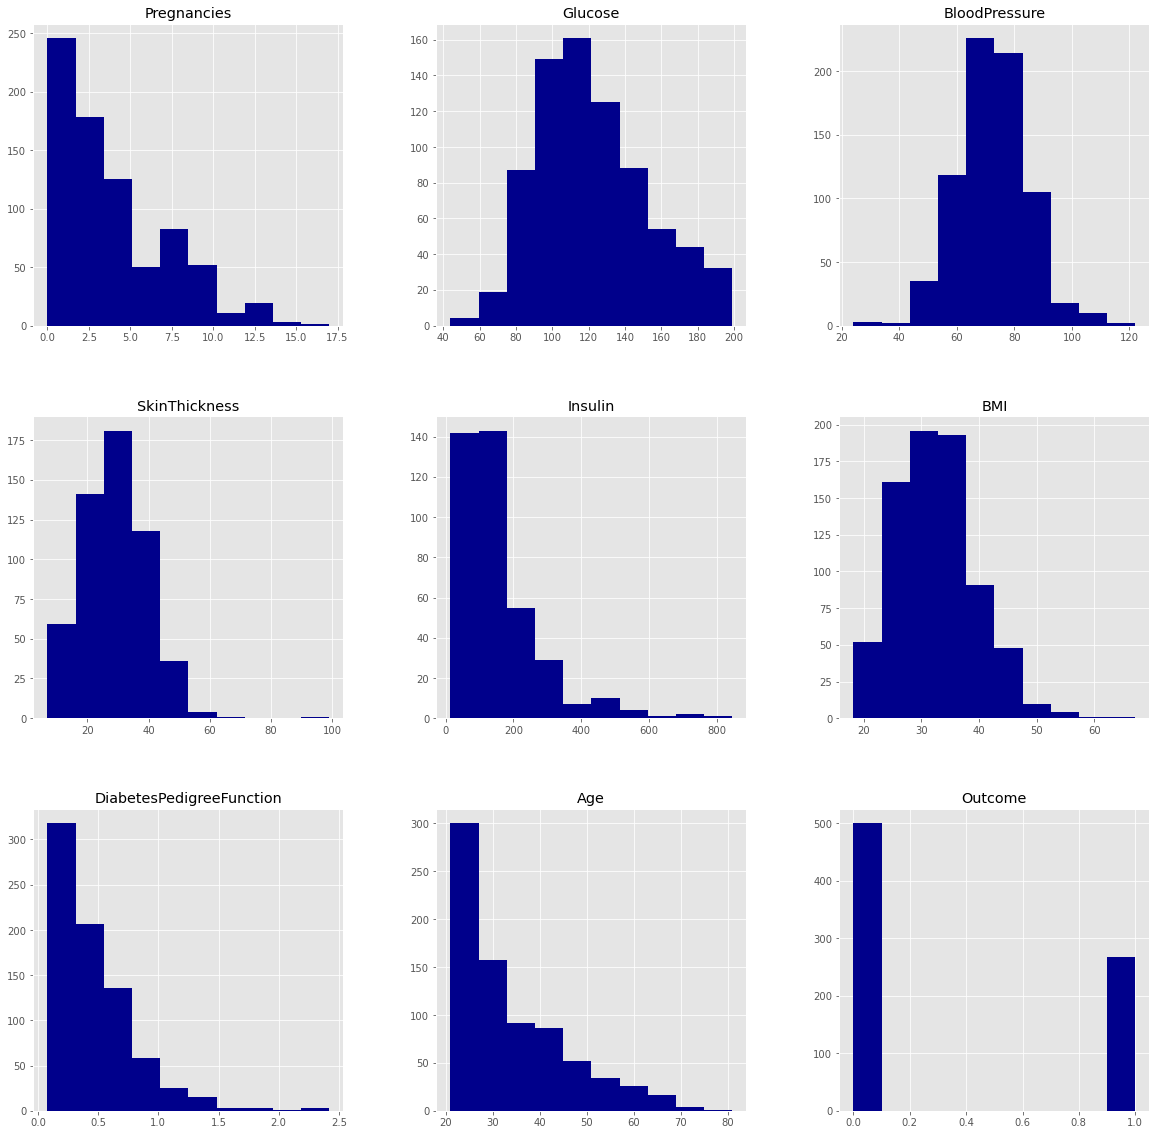

In [80]:
# Visualization before replace NaN
data_copy.hist(figsize = (20,20),color = "darkblue");

In [8]:
# Data imputation: NaN removal (fillna function)
data_copy['Glucose'].fillna(data_copy['Glucose'].mean(),inplace = True)
data_copy['BloodPressure'].fillna(data_copy['BloodPressure'].mean(), inplace = True)
data_copy['SkinThickness'].fillna(data_copy['SkinThickness'].median(), inplace = True)
data_copy['Insulin'].fillna(data_copy['Insulin'].median(), inplace = True)
data_copy['BMI'].fillna(data_copy['BMI'].median(), inplace = True)

In [9]:
#Data copy after NaN removal:
data_copy

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.0,72.0,35.0,125.0,33.6,0.627,50,1
1,1,85.0,66.0,29.0,125.0,26.6,0.351,31,0
2,8,183.0,64.0,29.0,125.0,23.3,0.672,32,1
3,1,89.0,66.0,23.0,94.0,28.1,0.167,21,0
4,0,137.0,40.0,35.0,168.0,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101.0,76.0,48.0,180.0,32.9,0.171,63,0
764,2,122.0,70.0,27.0,125.0,36.8,0.340,27,0
765,5,121.0,72.0,23.0,112.0,26.2,0.245,30,0
766,1,126.0,60.0,29.0,125.0,30.1,0.349,47,1


In [10]:
data_copy.isnull().sum()
#There is no NaN after NaN removal

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

### Plotting after Nan removal 

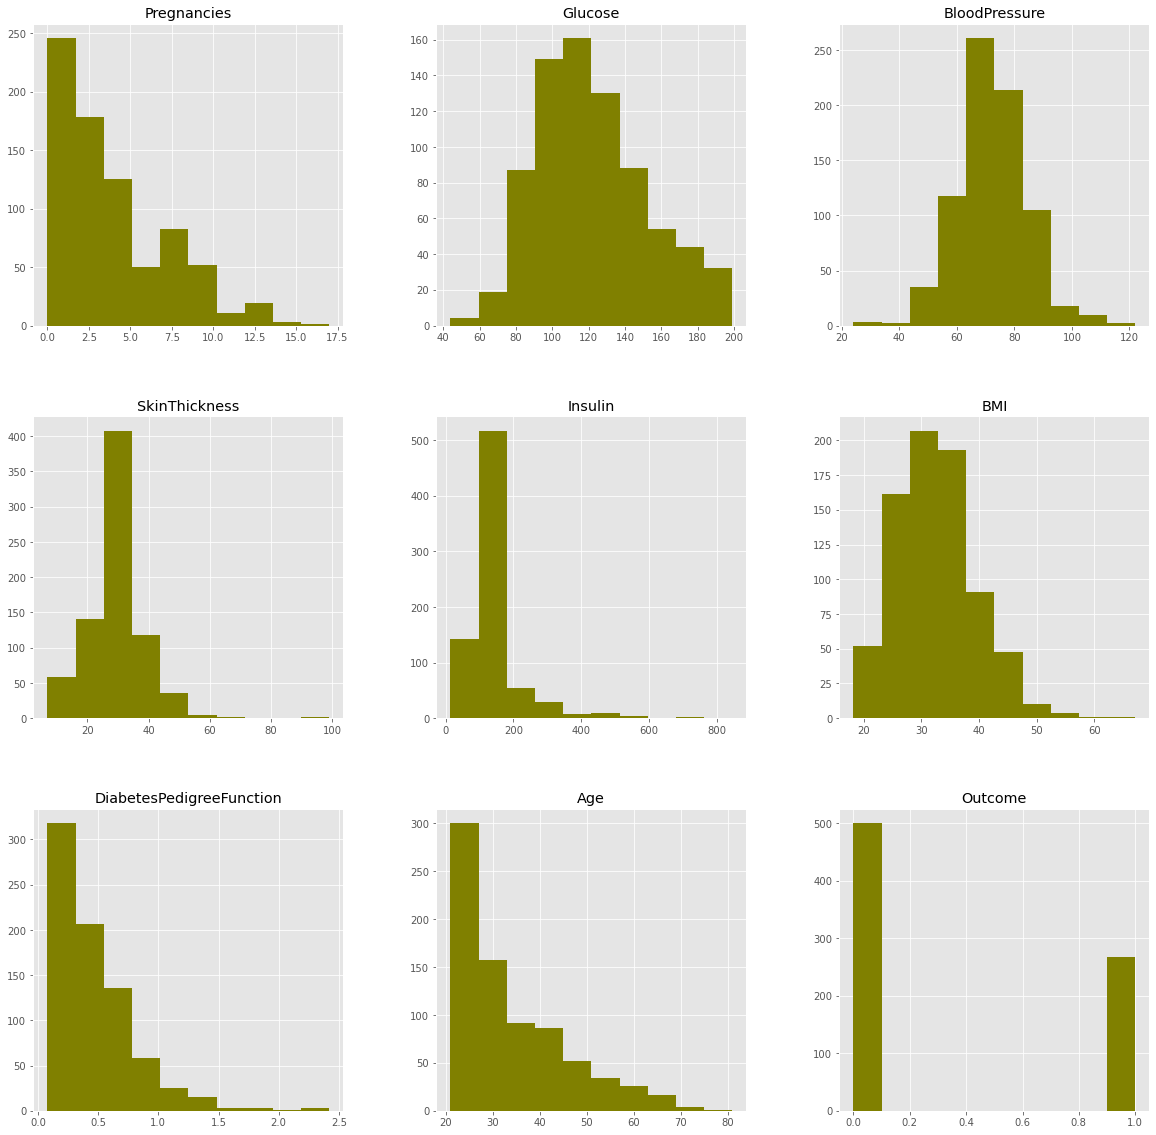

In [100]:
data_copy.hist(figsize = (20,20),color = "olive");

### Skewness

A ***left-skewed distribution*** has a long left tail. Left-skewed distributions are also called negatively-skewed distributions. That’s because there is a long tail in the negative direction on the number line. The mean is also to the left of the peak.

A ***right-skewed distribution*** has a long right tail. Right-skewed distributions are also called positive-skew distributions. That’s because there is a long tail in the positive direction on the number line. The mean is also to the right of the peak.


![](https://www.statisticshowto.datasciencecentral.com/wp-content/uploads/2014/02/pearson-mode-skewness.jpg)


#### to learn more about skewness
https://www.statisticshowto.datasciencecentral.com/probability-and-statistics/skewed-distribution/

int64      7
float64    2
dtype: int64


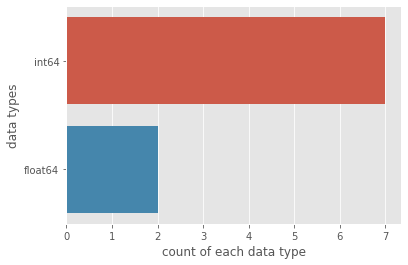

In [37]:
#Plot data type counts
sns.countplot(y = data.dtypes, data = data);
plt.xlabel("count of each data type")
plt.ylabel("data types")
print(data.dtypes.value_counts())

0    500
1    268
Name: Outcome, dtype: int64


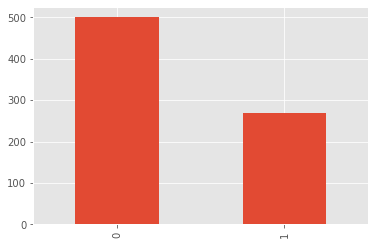

In [11]:
# Outcome analysis
print(data.Outcome.value_counts())
data.Outcome.value_counts().plot(kind = 'bar');

#### The above graph shows that the data is biased towards datapoints having outcome value as 0 where it means that diabetes was not present actually. The number of non-diabetics is almost twice the number of diabetic patients

#### Scatter matrix of uncleaned data

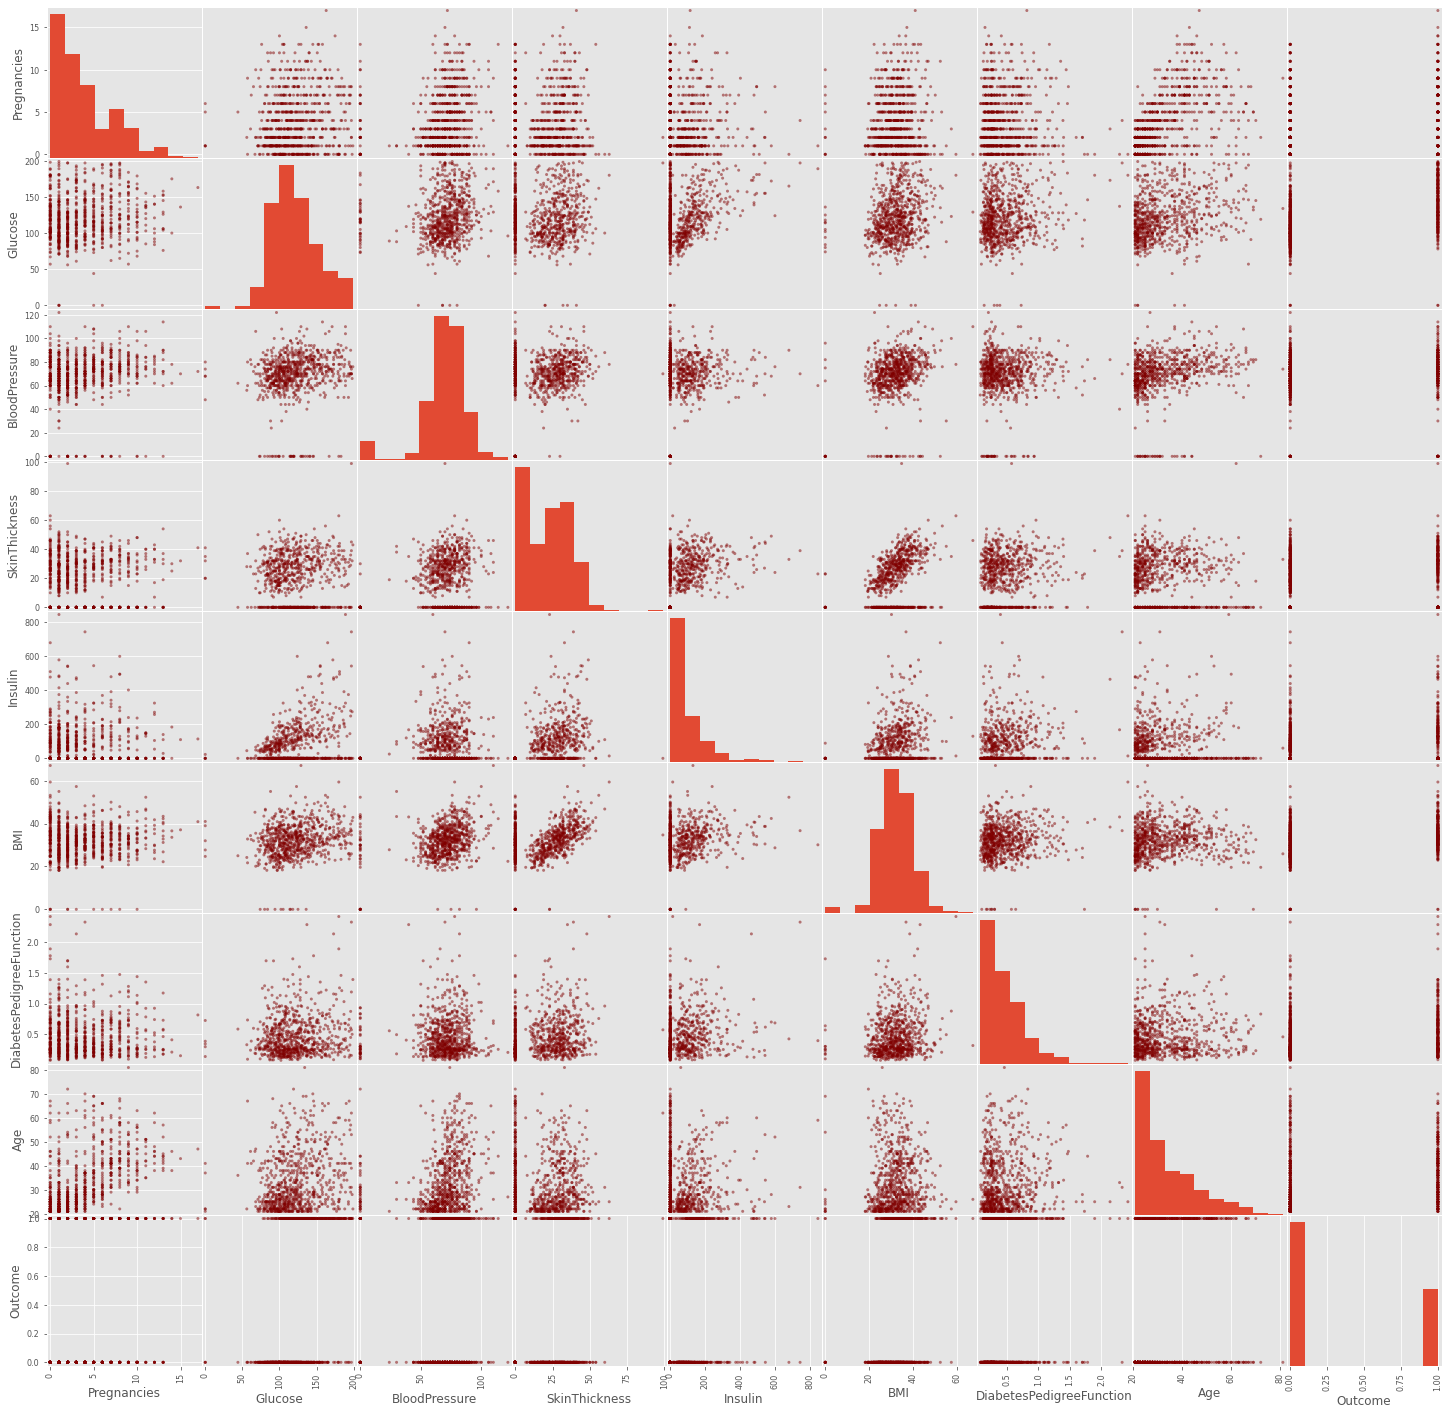

In [102]:
pd.plotting.scatter_matrix(data,figsize = (25,25),color = "maroon");

#### Scatter matrix of clean data (data_copy)

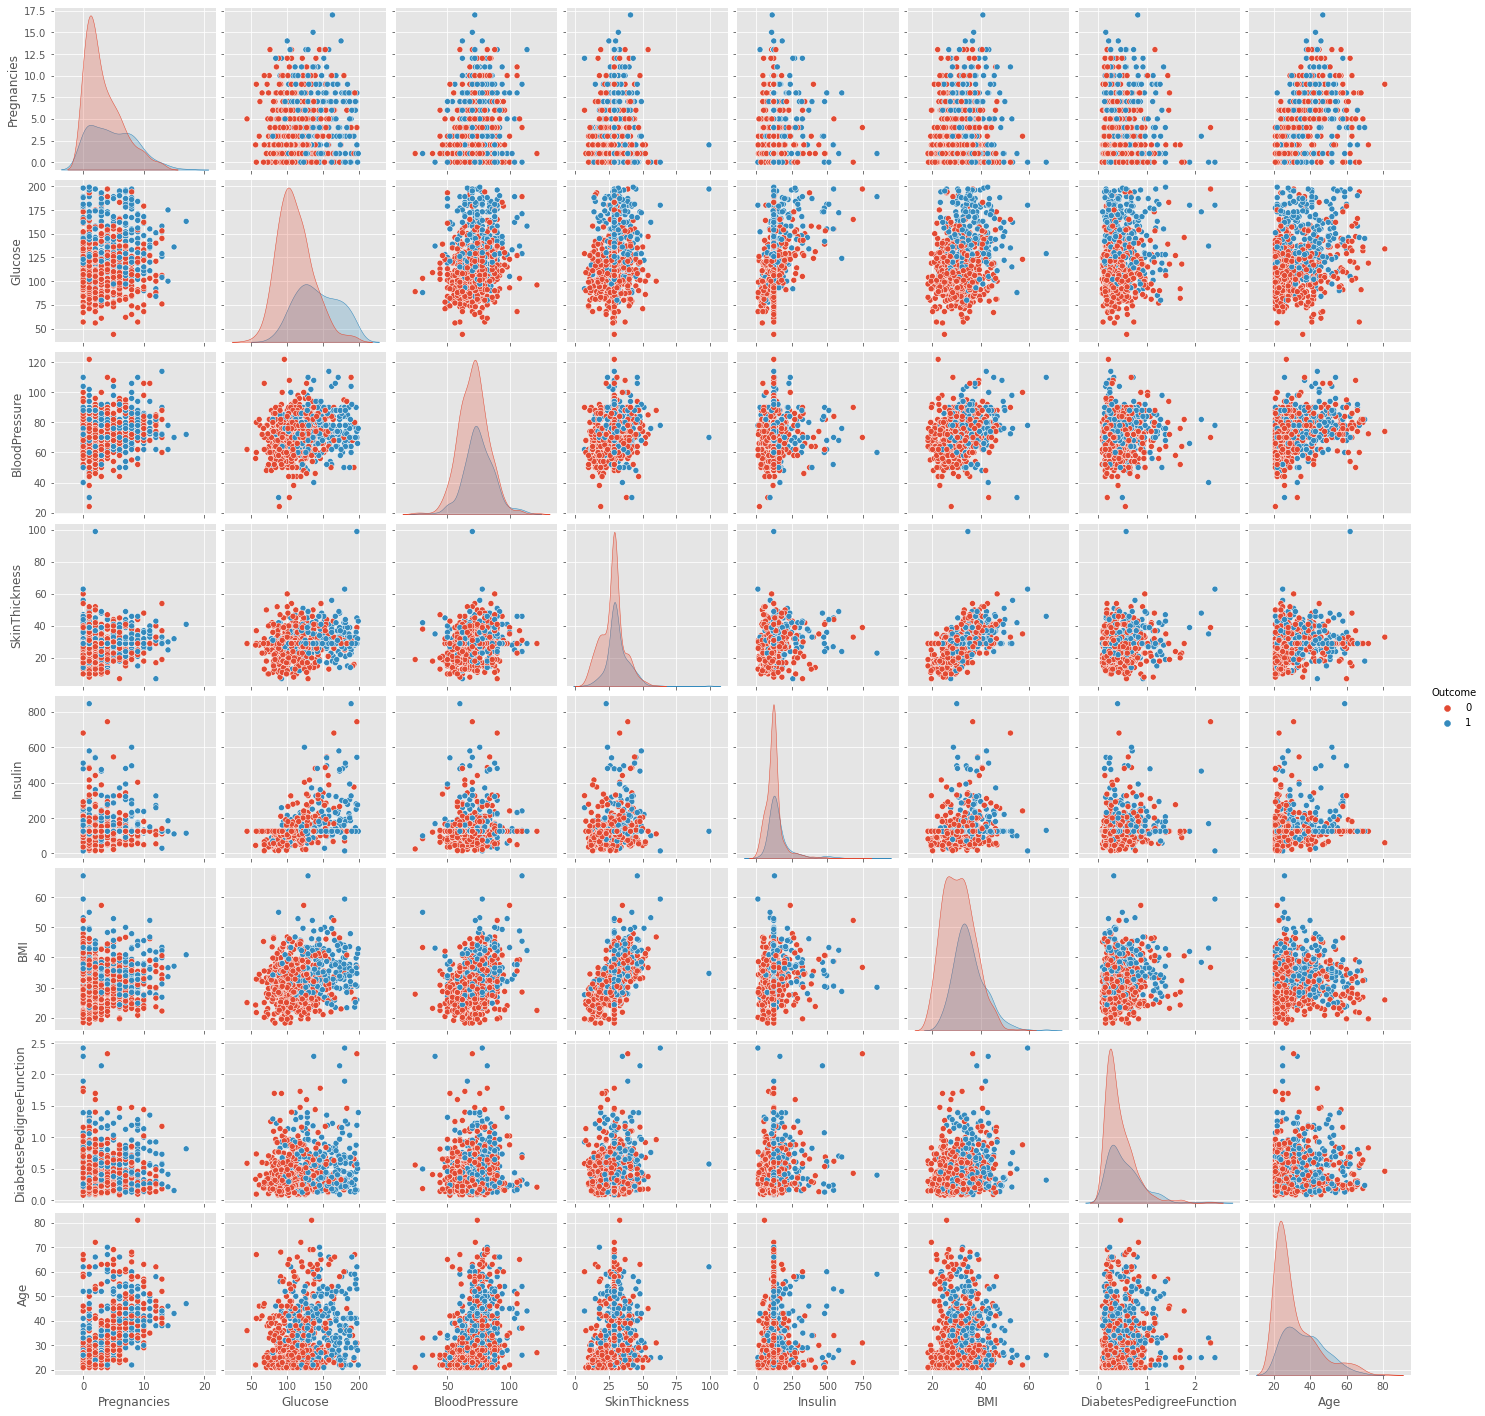

In [103]:
sns.pairplot(data = data_copy, hue = "Outcome");

***Pearson's Correlation Coefficient***: helps you find out the relationship between two quantities. It gives you the measure of the strength of association between two variables. The value of Pearson's Correlation Coefficient can be between -1 to +1. 1 means that they are highly correlated and 0 means no correlation.

A heat map is a two-dimensional representation of information with the help of colors. Heat maps can help the user visualize simple or complex information.

In [104]:
# Correlation Coefficient for unclean data (data)
data.corr()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.129459,0.141282,-0.081672,-0.073535,0.017683,-0.033523,0.544341,0.221898
Glucose,0.129459,1.000000,0.152590,0.057328,0.331357,0.221071,0.137337,0.263514,0.466581
BloodPressure,0.141282,0.152590,1.000000,0.207371,0.088933,0.281805,0.041265,0.239528,0.065068
SkinThickness,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970,0.074752
Insulin,-0.073535,0.331357,0.088933,0.436783,1.000000,0.197859,0.185071,-0.042163,0.130548
BMI,0.017683,0.221071,0.281805,0.392573,0.197859,1.000000,0.140647,0.036242,0.292695
DiabetesPedigreeFunction,-0.033523,0.137337,0.041265,0.183928,0.185071,0.140647,1.000000,0.033561,0.173844
Age,0.544341,0.263514,0.239528,-0.113970,-0.042163,0.036242,0.033561,1.000000,0.238356
Outcome,0.221898,0.466581,0.065068,0.074752,0.130548,0.292695,0.173844,0.238356,1.000000


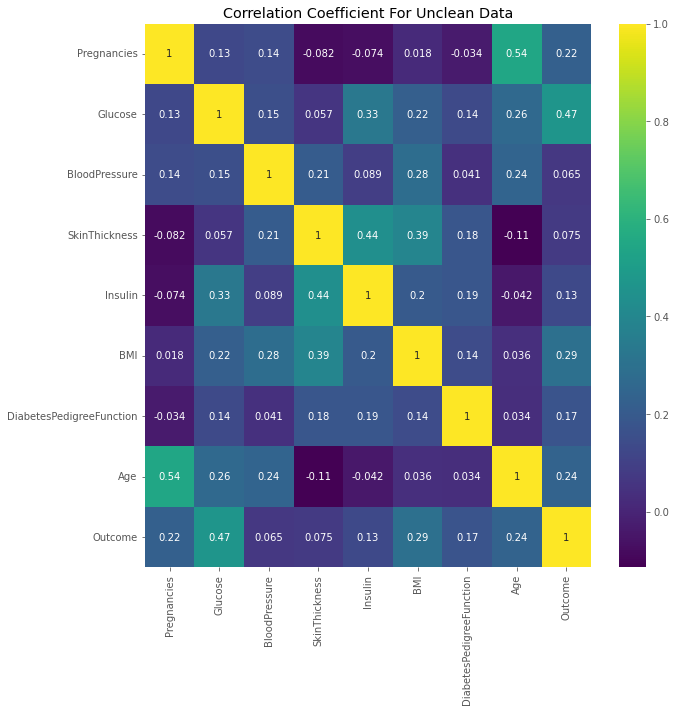

In [108]:
#Heatmap for Correlation Coefficient for unclean data
plt.figure(figsize = (10,10))
sns.heatmap(data = data.corr(),annot =True, cmap = "viridis");
plt.title("Correlation Coefficient For Unclean Data");

In [109]:
# Correlation Coefficient for clean data (data)
data_copy.corr()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.127911,0.208522,0.081770,0.025047,0.021559,-0.033523,0.544341,0.221898
Glucose,0.127911,1.000000,0.218367,0.192686,0.419064,0.231128,0.137060,0.266534,0.492928
BloodPressure,0.208522,0.218367,1.000000,0.191853,0.045087,0.281199,-0.002763,0.324595,0.166074
SkinThickness,0.081770,0.192686,0.191853,1.000000,0.155610,0.543205,0.102188,0.126107,0.214873
Insulin,0.025047,0.419064,0.045087,0.155610,1.000000,0.180241,0.126503,0.097101,0.203790
BMI,0.021559,0.231128,0.281199,0.543205,0.180241,1.000000,0.153438,0.025597,0.312038
DiabetesPedigreeFunction,-0.033523,0.137060,-0.002763,0.102188,0.126503,0.153438,1.000000,0.033561,0.173844
Age,0.544341,0.266534,0.324595,0.126107,0.097101,0.025597,0.033561,1.000000,0.238356
Outcome,0.221898,0.492928,0.166074,0.214873,0.203790,0.312038,0.173844,0.238356,1.000000


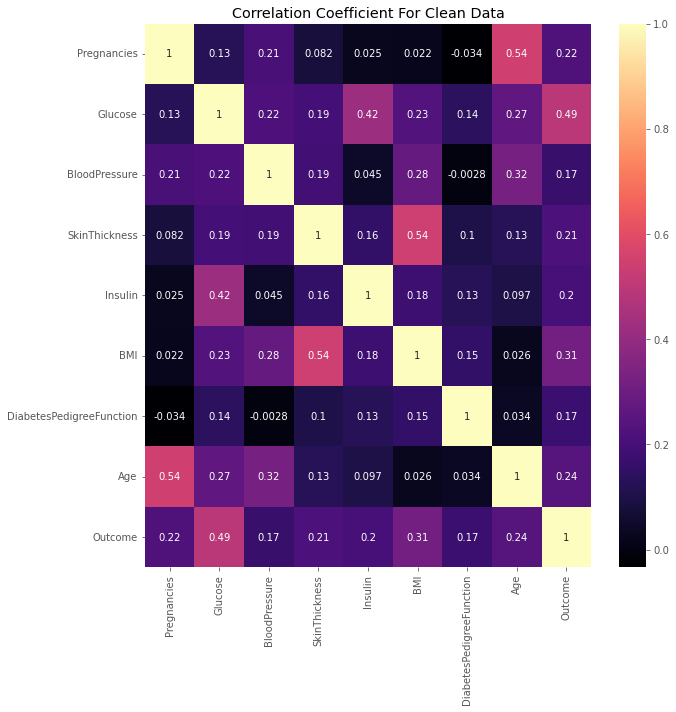

In [110]:
#Heatmap for Correlation Coefficient for clean data
plt.figure(figsize = (10,10))
sns.heatmap(data = data_copy.corr(),annot =True, cmap = "magma");
plt.title("Correlation Coefficient For Clean Data");

## Data Normalization (Scaling)

Data Z is rescaled such that μ = 0 and 𝛔 = 1, and is done through this formula:
![](https://cdn-images-1.medium.com/max/800/0*PXGPVYIxyI_IEHP7.)


#### to learn more about scaling techniques
https://medium.com/@rrfd/standardize-or-normalize-examples-in-python-e3f174b65dfc
https://machinelearningmastery.com/rescaling-data-for-machine-learning-in-python-with-scikit-learn/

In [16]:
from sklearn.preprocessing import StandardScaler

In [17]:
data_copy #Before scaling

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.0,72.0,35.0,125.0,33.6,0.627,50,1
1,1,85.0,66.0,29.0,125.0,26.6,0.351,31,0
2,8,183.0,64.0,29.0,125.0,23.3,0.672,32,1
3,1,89.0,66.0,23.0,94.0,28.1,0.167,21,0
4,0,137.0,40.0,35.0,168.0,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101.0,76.0,48.0,180.0,32.9,0.171,63,0
764,2,122.0,70.0,27.0,125.0,36.8,0.340,27,0
765,5,121.0,72.0,23.0,112.0,26.2,0.245,30,0
766,1,126.0,60.0,29.0,125.0,30.1,0.349,47,1


In [21]:
#Data normalization
standard = StandardScaler().fit_transform(data_copy.iloc[:,0:8])
X = pd.DataFrame(standard,columns = ["Pregnancies","Glucose","BloodPressure","SkinThickness","Insulin","BMI",
                           "DiabetesPedigreeFunction","Age"])
X #After scaling

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,0.639947,0.865108,-0.033518,0.670643,-0.181541,0.166619,0.468492,1.425995
1,-0.844885,-1.206162,-0.529859,-0.012301,-0.181541,-0.852200,-0.365061,-0.190672
2,1.233880,2.015813,-0.695306,-0.012301,-0.181541,-1.332500,0.604397,-0.105584
3,-0.844885,-1.074652,-0.529859,-0.695245,-0.540642,-0.633881,-0.920763,-1.041549
4,-1.141852,0.503458,-2.680669,0.670643,0.316566,1.549303,5.484909,-0.020496
...,...,...,...,...,...,...,...,...
763,1.827813,-0.680125,0.297376,2.150354,0.455573,0.064737,-0.908682,2.532136
764,-0.547919,0.010298,-0.198965,-0.239949,-0.181541,0.632365,-0.398282,-0.531023
765,0.342981,-0.022579,-0.033518,-0.695245,-0.332132,-0.910418,-0.685193,-0.275760
766,-0.844885,0.141808,-1.026200,-0.012301,-0.181541,-0.342790,-0.371101,1.170732


In [24]:
y = data_copy['Outcome']
y

0      1
1      0
2      1
3      0
4      1
      ..
763    0
764    0
765    0
766    1
767    0
Name: Outcome, Length: 768, dtype: int64

**After preprocessing data, we have X and y are the official input and output for training model.**

<h1 style= 'color: red'> Training Model </h1>

## Train-test split and Cross Validation methods

***Train Test Split*** : To have unknown datapoints to test the data rather than testing with the same points with which the model was trained. This helps capture the model performance much better.

![](https://cdn-images-1.medium.com/max/1600/1*-8_kogvwmL1H6ooN1A1tsQ.png)

***Cross Validation***: When model is split into training and testing it can be possible that specific type of data point may go entirely into either training or testing portion. This would lead the model to perform poorly. Hence over-fitting and underfitting problems can be well avoided with cross validation techniques

![](https://cdn-images-1.medium.com/max/1600/1*4G__SV580CxFj78o9yUXuQ.png)


***About Stratify*** : Stratify parameter makes a split so that the proportion of values in the sample produced will be the same as the proportion of values provided to parameter stratify.

For example, if variable y is a binary categorical variable with values 0 and 1 and there are 25% of zeros and 75% of ones, stratify=y will make sure that your random split has 25% of 0's and 75% of 1's.

For Reference : https://towardsdatascience.com/train-test-split-and-cross-validation-in-python-80b61beca4b6

In [41]:
#train-test-split
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 1/3,random_state = 42, stratify = y)
print("X_train:", X_train.shape)
print("X_test:", X_test.shape)

X_train: (512, 8)
X_test: (256, 8)


In [66]:
#Training with k value range from 1-20 to find the best k value
from sklearn.neighbors import KNeighborsClassifier
ks = 21
train_score = []
test_score = []
for k in range(1,ks):
    knn = KNeighborsClassifier(n_neighbors = k,weights ='uniform').fit(X_train,y_train)
    train_score.append(knn.score(X_train,y_train))
    test_score.append(knn.score(X_test,y_test))

In [68]:
for i in range(1,len(train_score) + 1):
    print("Epoch {}, k = {}".format(i,i))
    print("Accuracy score on train set: {}".format(train_score[i-1]))
    print("Accuracy score on test set: {}".format(test_score[i-1]))

Epoch 1, k = 1
Accuracy score on train set: 1.0
Accuracy score on test set: 0.73046875
Epoch 2, k = 2
Accuracy score on train set: 0.84375
Accuracy score on test set: 0.73046875
Epoch 3, k = 3
Accuracy score on train set: 0.8671875
Accuracy score on test set: 0.74609375
Epoch 4, k = 4
Accuracy score on train set: 0.8359375
Accuracy score on test set: 0.7421875
Epoch 5, k = 5
Accuracy score on train set: 0.828125
Accuracy score on test set: 0.7421875
Epoch 6, k = 6
Accuracy score on train set: 0.8046875
Accuracy score on test set: 0.72265625
Epoch 7, k = 7
Accuracy score on train set: 0.814453125
Accuracy score on test set: 0.74609375
Epoch 8, k = 8
Accuracy score on train set: 0.802734375
Accuracy score on test set: 0.74609375
Epoch 9, k = 9
Accuracy score on train set: 0.798828125
Accuracy score on test set: 0.74609375
Epoch 10, k = 10
Accuracy score on train set: 0.802734375
Accuracy score on test set: 0.73046875
Epoch 11, k = 11
Accuracy score on train set: 0.798828125
Accuracy scor

In [56]:
print(train_score)

[1.         0.84375    0.8671875  0.8359375  0.828125   0.8046875
 0.81445312 0.80273438 0.79882812 0.80273438 0.79882812 0.79296875
 0.79492188 0.796875   0.81054688 0.80859375 0.80078125 0.796875
 0.81054688]


In [57]:
print(test_score)

[0.73046875 0.73046875 0.74609375 0.7421875  0.7421875  0.72265625
 0.74609375 0.74609375 0.74609375 0.73046875 0.765625   0.734375
 0.75       0.734375   0.73828125 0.73046875 0.75390625 0.73828125
 0.74609375]


## Result visualization

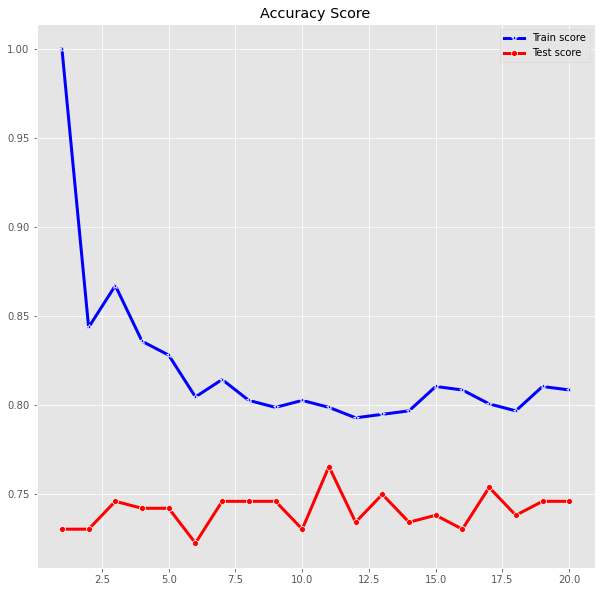

In [76]:
plt.figure(figsize = (10,10))
sns.lineplot(range(1,ks),train_score,marker = "*",label = "Train score",linewidth = 3,color = "blue")
sns.lineplot(range(1,ks),test_score,marker = "o",label = "Test score",linewidth = 3,color = "red")
plt.legend();
plt.title("Accuracy Score");

#### The best result is captured at k = 11 hence 11 is used for the final model

In [77]:
knn = KNeighborsClassifier(n_neighbors = 11)
knn.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=11)

In [78]:
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test,knn.predict(X_test)))

0.765625


<h1 style= 'color: red'> Model Performance Analysis (Evaluation) </h1>

## 1) Confusion matrix

In [79]:
from sklearn.metrics import confusion_matrix
y_hat = knn.predict(X_test)
cfm = confusion_matrix(y_test,y_hat)
cfm

array([[142,  25],
       [ 35,  54]], dtype=int64)

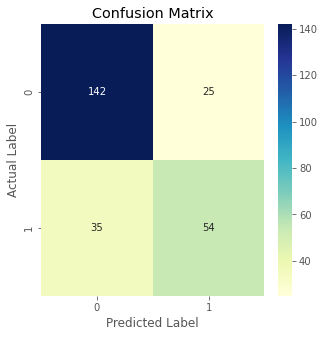

In [87]:
#Visualization
plt.figure(figsize = (5,5))
sns.heatmap(cfm,annot = True, cmap = "YlGnBu",fmt = 'g')
plt.xlabel("Predicted Label")
plt.ylabel("Actual Label")
plt.title("Confusion Matrix");

## 2) Classification Report

#### Precision Score
        TP – True Positives
        FP – False Positives

        Precision – Accuracy of positive predictions.
        Precision = TP/(TP + FP)
        
   
#### Recall Score
        FN – False Negatives

        Recall(sensitivity or true positive rate): Fraction of positives that were correctly identified.
        Recall = TP/(TP+FN)
        
#### F1 Score
        F1 Score (aka F-Score or F-Measure) – A helpful metric for comparing two classifiers.
        F1 Score takes into account precision and the recall. 
        It is created by finding the the harmonic mean of precision and recall.

        F1 = 2 x (precision x recall)/(precision + recall)
        
        
        
> > ***Precision*** - Precision is the ratio of correctly predicted positive observations to the total predicted positive observations. The question that this metric answer is of all passengers that labeled as survived, how many actually survived? High precision relates to the low false positive rate. We have got 0.788 precision which is pretty good.
> > 
> > Precision = TP/TP+FP
> > 
> > ***Recall (Sensitivity)*** - Recall is the ratio of correctly predicted positive observations to the all observations in actual class - yes. The question recall answers is: Of all the passengers that truly survived, how many did we label? A recall greater than 0.5 is good.
> > 
> > Recall = TP/TP+FN
> > 
> > ***F1 score*** - F1 Score is the weighted average of Precision and Recall. Therefore, this score takes both false positives and false negatives into account. Intuitively it is not as easy to understand as accuracy, but F1 is usually more useful than accuracy, especially if you have an uneven class distribution. Accuracy works best if false positives and false negatives have similar cost. If the cost of false positives and false negatives are very different, it’s better to look at both Precision and Recall. 
> > 
> > F1 Score = 2*(Recall * Precision) / (Recall + Precision)

In [89]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_hat))

              precision    recall  f1-score   support

           0       0.80      0.85      0.83       167
           1       0.68      0.61      0.64        89

    accuracy                           0.77       256
   macro avg       0.74      0.73      0.73       256
weighted avg       0.76      0.77      0.76       256



## 3) ROC - AUC

In [91]:
from sklearn.metrics import roc_curve
X_test

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
52,0.342981,-1.107530,-0.529859,-0.922893,-1.363098,-1.172400,-0.392242,-0.275760
64,0.936914,-0.252720,-0.529859,-0.012301,-0.181541,0.050183,-0.645932,0.745293
630,0.936914,-0.252720,-0.695306,-0.012301,-0.181541,-0.735763,0.785604,0.064591
707,-0.547919,0.174685,-2.184328,-0.922893,2.251075,0.283056,-0.893582,-0.956462
330,1.233880,-0.121211,-0.033518,-1.150541,-0.181541,-1.361609,3.032573,1.085644
...,...,...,...,...,...,...,...,...
33,0.639947,-0.976020,1.620951,-0.012301,-0.181541,-1.827355,-0.857340,-0.445935
596,-1.141852,-1.797953,0.297376,-0.012301,-0.181541,1.869503,-0.839219,1.085644
88,3.312645,0.470581,-0.198965,0.329171,-0.355300,0.676029,-0.963044,0.830381
679,-0.547919,-0.680125,-1.191647,-1.378189,1.440203,-1.201509,0.429230,-0.871374


In [100]:
knn.predict_proba(X_test)[:10]

array([[1.        , 0.        ],
       [0.27272727, 0.72727273],
       [0.63636364, 0.36363636],
       [0.90909091, 0.09090909],
       [0.54545455, 0.45454545],
       [0.72727273, 0.27272727],
       [0.27272727, 0.72727273],
       [0.09090909, 0.90909091],
       [1.        , 0.        ],
       [0.81818182, 0.18181818]])

In [101]:
knn.predict(X_test)[:10]

array([0, 1, 0, 0, 0, 0, 1, 1, 0, 0], dtype=int64)

In [ ]:
# Compare classification by binary score and by numeric score

In [127]:
#prepare for ROC curve
y_prob = knn.predict_proba(X_test)[:,1]
tpr, fpr, thresholds = roc_curve(y_test, y_prob)

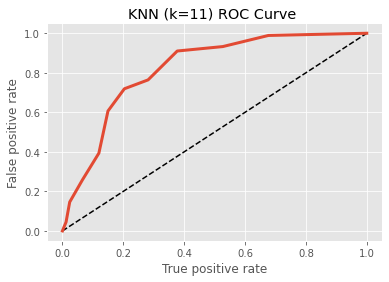

In [133]:
#plot ROC curve
plt.plot([0,1],[0,1],'k--')
plt.plot(tpr,fpr, linewidth = 3)
plt.xlabel("True positive rate")
plt.ylabel("False positive rate")
plt.title("KNN (k=11) ROC Curve ");

In [135]:
#AUC score (Area Under The roc Curve)
from sklearn.metrics import roc_auc_score
print(roc_auc_score(y_test, y_prob))

0.8193500639171096


# Hyper Parameter optimization

Is there any values of k the give us better score than k = 11. Previously, we just find k in from 1 to 20. So using GridSearch CV will help us to find the best values for k in a more convenient way in case k is larger.
[https://www.mygreatlearning.com/blog/gridsearchcv/].

In [156]:
#import GridSearch Cv
from sklearn.model_selection import GridSearchCV
#Example 1 with KNN model: 
param ={"n_neighbors": np.arange(1,50)} #Find k from 1 to 50 
knn = KNeighborsClassifier()
knn_cv = GridSearchCV(estimator = knn, param_grid = param, n_jobs = 1,cv = 5, scoring = 'accuracy')
knn_cv.fit(X,y)
print("Best parameter: {}".format(knn_cv.best_params_))
print("Best score: {}".format(knn_cv.best_score_))

Best parameter: {'n_neighbors': 25}
Best score: 0.7721840251252015
